In [ ]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf

In [ ]:
# DataLoader
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# 모델에 데이터 입력하기 전에 1) 255로 나누고 2) 한 줄로 데이터를 펼쳐서 입력
print(X_train.shape)
L, W, H = X_train.shape
X_train = X_train.reshape(-1, H * W) / 255
X_test = X_test.reshape(-1, H * W) / 255
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
# y값 전처리하기...One Hot Encoding
print(y_train[0])
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 하이퍼 파라미터 지정
input = 28*28
unit = 100
numClasses = 10
epochs = 10
bSize = 100

In [ ]:
# model 생성
model = models.Sequential()
model.add(layers.Dense(units=unit, activation='relu', input_shape=(input, )))
model.add(layers.Dense(units=numClasses, activation='softmax'))

In [ ]:
# compile
model.compile('sgd', 'categorical_crossentropy', 'accuracy')

In [ ]:
# fit
model.fit(X_train, Y_train, epochs=10, batch_size=bSize, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 1.6306 - accuracy: 0.5443 - val_loss: 0.6423 - val_accuracy: 0.8522
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.6112 - accuracy: 0.8492 - val_loss: 0.4546 - val_accuracy: 0.8854
Epoch 3/10
480/480 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.8770 - val_loss: 0.3901 - val_accuracy: 0.8945
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8915 - val_loss: 0.3555 - val_accuracy: 0.9007
Epoch 5/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3683 - accuracy: 0.8995 - val_loss: 0.3325 - val_accuracy: 0.9077
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.9056 - val_loss: 0.3160 - val_accuracy: 0.9124
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.9086 - val_loss: 0.3029 - val_accuracy: 0.9154
Epoch 

In [ ]:
# evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size=bSize)
print("Loss : {}, Accuracy : {}".format(*model_performance))

100/100 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9231
Loss : 0.27485623955726624, Accuracy : 0.9230999946594238


In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=bSize, validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 2s 3ms/step - loss: 0.2825 - accuracy: 0.9217 - val_loss: 0.2671 - val_accuracy: 0.9255
Epoch 2/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.9237 - val_loss: 0.2600 - val_accuracy: 0.9276
Epoch 3/50
480/480 [==============================] - 2s 3ms/step - loss: 0.2667 - accuracy: 0.9257 - val_loss: 0.2540 - val_accuracy: 0.9293
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2597 - accuracy: 0.9275 - val_loss: 0.2479 - val_accuracy: 0.9306
Epoch 5/50
480/480 [==============================] - 2s 3ms/step - loss: 0.2533 - accuracy: 0.9302 - val_loss: 0.2425 - val_accuracy: 0.9325
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2471 - accuracy: 0.9319 - val_loss: 0.2375 - val_accuracy: 0.9337
Epoch 7/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2412 - accuracy: 0.9334 - val_loss: 0.2333 - val_accuracy: 0.9346
Epoch 

In [ ]:
# 시각화
# history...학습할 때 나오는 로그메시지 다 모아서 리턴
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

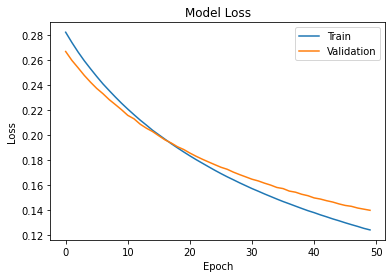

In [ ]:
plot_loss(history)

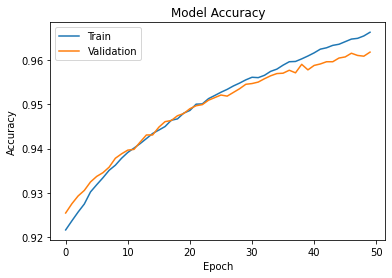

In [ ]:
plot_accuracy(history)